In [15]:
from torch.nn import  Sequential, Conv2d, ReLU, AvgPool2d
from torchvision.datasets import ImageFolder
from torch.nn import functional as fun
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.optim as optim
from torch import cuda
from torch import nn
import torchvision
import matplotlib
import torch
import os

In [ ]:
devices = torch.device('cuda' if cuda.is_available() else 'cpu')
print(devices)

In [10]:
data_dir = './Data/'


print(os.listdir(data_dir)) #folders in the dataset folder
classes = os.listdir(data_dir + "/Training")
classes = os.listdir(data_dir+'/Training') 
print ('first 10 classes')
print(classes)

['Validation', 'Training', 'Test']
first 10 classes
['cucumber_1', 'cabbage_white_1', 'apple_golden_3', 'apple_rotten_1', 'apple_red_1', 'apple_hit_1', 'apple_red_3', 'apple_red_yellow_1', 'apple_6', 'apple_braeburn_1', 'cucumber_3', 'zucchini_dark_1', 'carrot_1', 'pear_1', 'apple_red_2', 'eggplant_violet_1', 'pear_3', 'apple_red_delicios_1', 'apple_pink_lady_1', 'apple_golden_2', 'apple_golden_1', 'zucchini_1', 'apple_crimson_snow_1', 'apple_granny_smith_1']


In [21]:
size = (100,100)
trans = transforms.Compose(
    [
        transforms.Resize(size=size),
        # transforms.CenterCrop(50),
        transforms.ColorJitter(brightness=.5,contrast=.4,hue=.6),
        transforms.RandomEqualize(),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)

In [22]:
TraimData = ImageFolder(data_dir+"/Training", transform=trans)

In [23]:
img, label = TraimData[0]
print(img.shape, label)
img,TraimData.classes[label]

torch.Size([3, 100, 100]) 0


(tensor([[[2.1804, 2.1804, 2.1804,  ..., 2.1804, 2.1804, 2.1804],
          [2.1804, 2.1804, 2.1804,  ..., 2.1804, 2.1804, 2.1804],
          [2.1804, 2.1804, 2.1804,  ..., 2.1804, 2.1804, 2.1804],
          ...,
          [2.1804, 2.1804, 2.1804,  ..., 2.1804, 2.1804, 2.1804],
          [2.1804, 2.1804, 2.1804,  ..., 2.1804, 2.1804, 2.1804],
          [2.1804, 2.1804, 2.1804,  ..., 2.1804, 2.1804, 2.1804]],
 
         [[2.3585, 2.3585, 2.3585,  ..., 2.3585, 2.3585, 2.3585],
          [2.3585, 2.3585, 2.3585,  ..., 2.3585, 2.3585, 2.3585],
          [2.3585, 2.3585, 2.3585,  ..., 2.3585, 2.3585, 2.3585],
          ...,
          [2.3585, 2.3585, 2.3585,  ..., 2.3585, 2.3585, 2.3585],
          [2.3585, 2.3585, 2.3585,  ..., 2.3585, 2.3585, 2.3585],
          [2.3585, 2.3585, 2.3585,  ..., 2.3585, 2.3585, 2.3585]],
 
         [[2.5703, 2.5703, 2.5703,  ..., 2.5703, 2.5703, 2.5703],
          [2.5703, 2.5703, 2.5703,  ..., 2.5703, 2.5703, 2.5703],
          [2.5703, 2.5703, 2.5703,  ...,

In [24]:
def show_example(img, label):
    print('Label: ', TraimData.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  apple_6 (0)


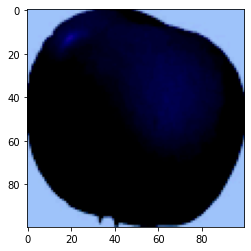

In [31]:
show_example(*TraimData[50])

In [ ]:
trainData = torchvision.datasets.ImageFolder(root=trainPath,transform=trans)
testData = torchvision.datasets.ImageFolder(root=testPath,transform=trans)
varData = torchvision.datasets.ImageFolder(root=varPath,transform=trans)

In [ ]:
from torch.utils import data

batch_size = 60
train_data_loader = data.DataLoader(trainData,batch_size=batch_size)
val_data_loader = data.DataLoader(varData,batch_size=batch_size)
test_data_loader = data.DataLoader(testData,batch_size=batch_size)

In [ ]:
class fruitModel(nn.Module):
    def __init__(self, num_classes=155):
        super(fruitModel, self).__init__()
        self.features=nn.Sequential(nn.Conv2d(3,64,kernel_size=11,stride=2,padding=2),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=3,stride=2),
                                    
                                   nn.Conv2d(64,192,kernel_size=5,padding=2),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=3,stride=2),
                                    
                                   nn.Conv2d(192,384,kernel_size=3,padding=1),
                                   nn.ReLU(),
                                   nn.Conv2d(384,256,kernel_size=3,padding=1),
                                   nn.ReLU(),
                                   nn.Conv2d(256,256,kernel_size=3,padding=1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=3, stride=2),
                                   )
        self.avgpool = nn.AdaptiveAvgPool2d((6,6))
        self.classifier = nn.Sequential(nn.Dropout(),
                                       nn.Linear(256*6*6,4096),
                                       nn.ReLU(),
                                       nn.Dropout(),
                                       nn.Linear(4096,4096),
                                       nn.ReLU(),
                                       nn.Linear(4096, num_classes))
    def forward(self,x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x,1)
        x = self.classifier(x)
        return x

In [ ]:
cnet = fruitModel()
cnet.to(devices)
optimizer = optim.Adam(cnet.parameters(),lr=0.001)

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20,device="cpu"):
    for epoch in range(epochs):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output, targets)
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output),dim=1)[1],targets).view(-1)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)
        if epoch == 0:
            print(device)
        print('Epoch: {},Training Loss: {:.2f}, Validation Loss: {:.2f}, accuray = {:.2f}'.format(epoch + 1 , training_loss, valid_loss, num_correct / num_examples))

In [ ]:
train(cnet,optimizer,torch.nn.CrossEntropyLoss(),train_data_loader,val_data_loader,device=devices)